# Analise de cursos de uma Faculadede.

In [1]:
#pip isntall matplotlib -q

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df =pd.read_csv('dados_alunos.csv')

In [2]:
df.head()

,nome,idade,genero,curso,semestre,nota_final,faltas
0,Fernanda,22,F,Engenharia,7,8.85,21
1,Eduardo,28,M,ADS,1,6.49,9
2,Igor,24,M,Arquitetura,3,5.85,8
3,Igor,29,F,Arquitetura,10,5.65,7
4,Bruno,28,M,Arquitetura,7,8.64,5


In [3]:
df.tail()

,nome,idade,genero,curso,semestre,nota_final,faltas
95,Helena,26,M,ADS,2,6.65,21
96,Carlos,20,F,Engenharia,8,9.33,24
97,Diana,27,M,Direito,1,9.31,17
98,Igor,27,F,Medicina,9,8.88,17
99,Carlos,22,F,Medicina,8,9.75,21


In [4]:
df.shape

(100, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nome        100 non-null    object 
 1   idade       100 non-null    int64  
 2   genero      100 non-null    object 
 3   curso       100 non-null    object 
 4   semestre    100 non-null    int64  
 5   nota_final  100 non-null    float64
 6   faltas      100 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [6]:
df.describe()

,idade,semestre,nota_final,faltas
count,100.000000,100.000000,100.000000,100.000000
mean,26.130000,5.880000,7.546800,15.000000
std,4.871386,2.985757,1.547776,9.222283
min,18.000000,1.000000,5.000000,0.000000
25%,22.000000,3.000000,6.060000,7.000000
50%,26.000000,6.000000,7.980000,14.000000
75%,30.000000,8.000000,8.872500,24.000000
max,35.000000,10.000000,9.980000,30.000000


In [7]:
df.describe(include='object')

,nome,genero,curso
count,100,100,100
unique,10,2,5
top,Diana,F,ADS
freq,16,64,26


In [8]:
df['nome'].value_counts()

nome
Diana       16
Helena      16
Igor        14
Carlos      10
Juliana      9
Bruno        9
Eduardo      8
Ana          7
Gustavo      6
Fernanda     5
Name: count, dtype: int64

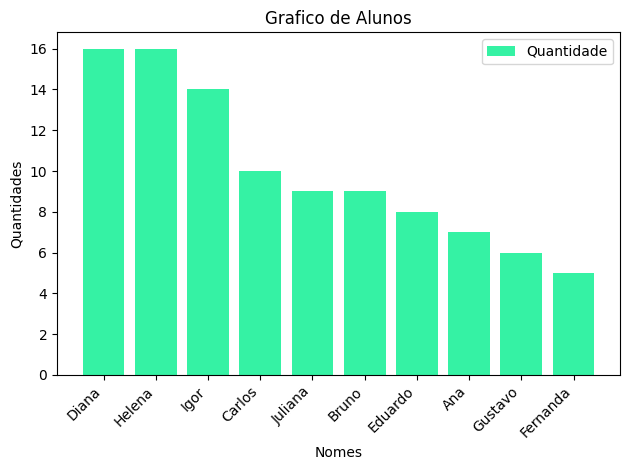

In [9]:
contagem_nomes = df['nome'].value_counts()

plt.bar(contagem_nomes.index , contagem_nomes.values, label='Quantidade', color='#35f2a4')
plt.xticks(rotation=45, ha='right')
plt.title('Grafico de Alunos')
plt.xlabel('Nomes')
plt.ylabel('Quantidades')
plt.tight_layout()
plt.legend()
plt.show()

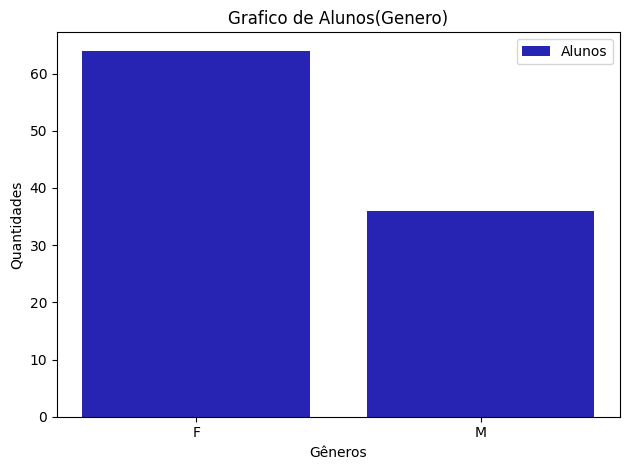

In [10]:
contagem_genero = df['genero'].value_counts()

plt.bar(contagem_genero.index,contagem_genero.values, color='#2824b3', label='Alunos')
plt.title('Grafico de Alunos(Genero)')
plt.xlabel('Gêneros')
plt.ylabel('Quantidades')
plt.tight_layout()
plt.legend()
plt.show()

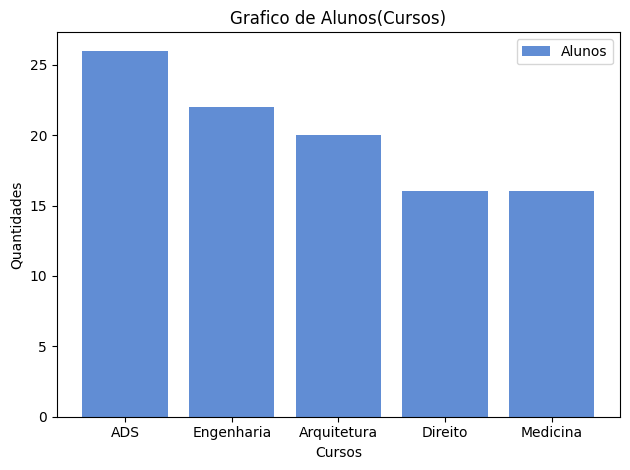

In [11]:
contagem_cursos = df['curso'].value_counts()

plt.bar(contagem_cursos.index,contagem_cursos.values, label='Alunos', color='#618dd4')
plt.title('Grafico de Alunos(Cursos)')
plt.xlabel('Cursos')
plt.ylabel('Quantidades')
plt.tight_layout()
plt.legend()
plt.show()

# Nota media por curso 

C:\Users\aluno.manha\AppData\Local\Temp\ipykernel_25560\3142189674.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


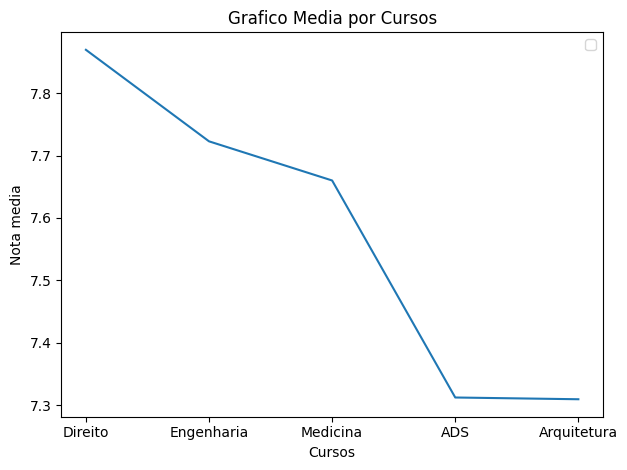

In [12]:
nota_media_por_curso = df.groupby('curso')['nota_final'].mean().sort_values(ascending=False)

plt.plot(nota_media_por_curso)
plt.title('Grafico Media por Cursos')
plt.xlabel('Cursos')
plt.ylabel('Nota media')
plt.tight_layout()
plt.legend()
plt.show()

# Quantidade de Aluno homens e mulheres por curso

C:\Users\aluno.manha\AppData\Local\Temp\ipykernel_25560\3746431976.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


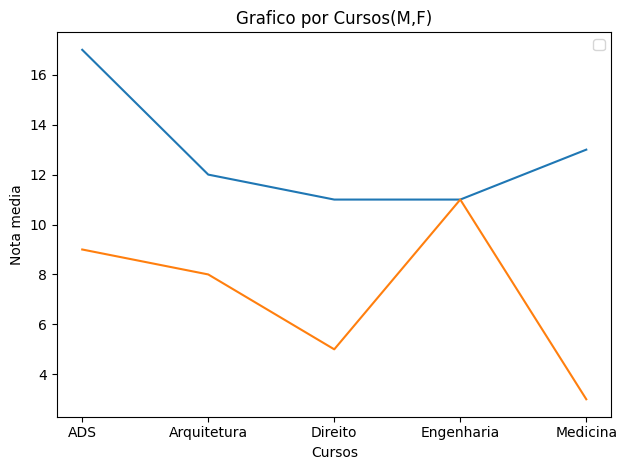

In [13]:
quantidades_de_aluno = df.groupby(['curso','genero']).size().unstack(fill_value=0)

plt.plot(quantidades_de_aluno)
plt.title('Grafico por Cursos(M,F)')
plt.xlabel('Cursos')
plt.ylabel('Nota media')
plt.tight_layout()
plt.legend()
plt.show()

# Nota  media dos homens das mulheres

In [14]:
notamdeia_genero = df.groupby('genero')['nota_final'].mean()

C:\Users\aluno.manha\AppData\Local\Temp\ipykernel_25560\4003316347.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


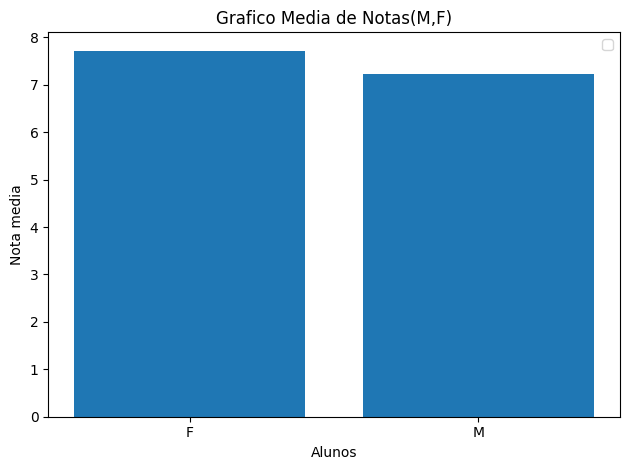

In [15]:
plt.bar(notamdeia_genero.index, notamdeia_genero.values)
plt.title('Grafico Media de Notas(M,F)')
plt.xlabel('Alunos')
plt.ylabel('Nota media')
plt.tight_layout()
plt.legend()
plt.show()

# Media de semestre por cursos

In [16]:
media_semestrecursos = df.groupby(['curso', 'semestre'])['nota_final'].mean().unstack()

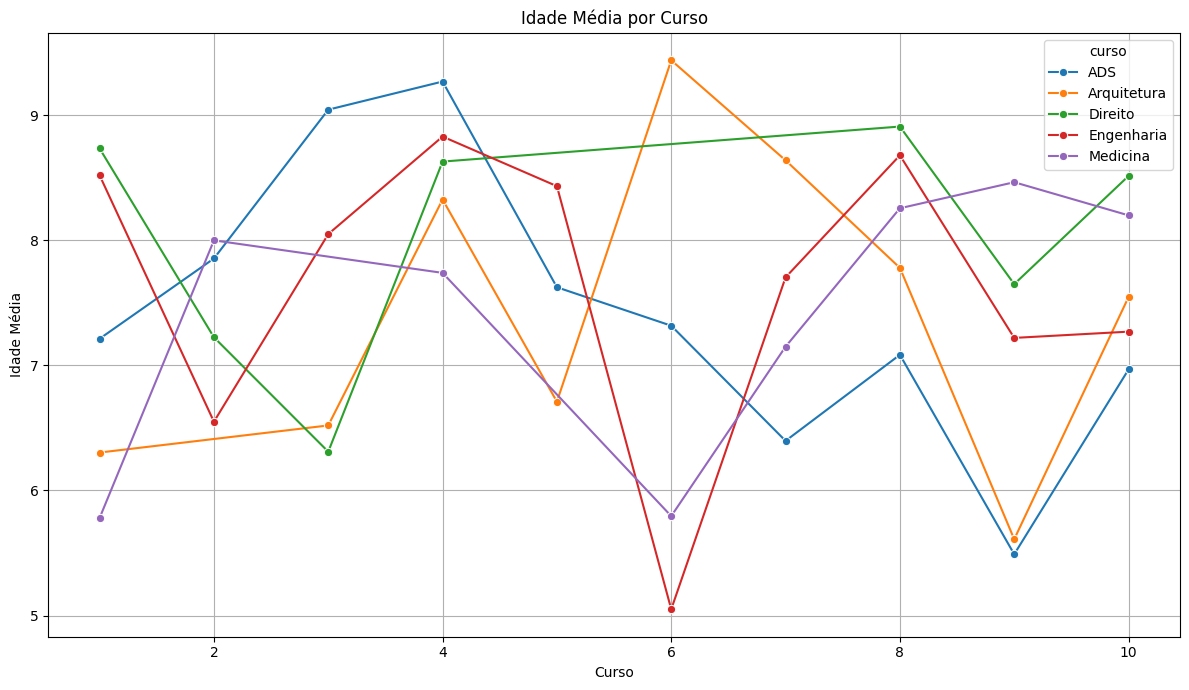

In [17]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df.groupby(['curso', 'semestre'])['nota_final'].mean().reset_index(),
             x='semestre', y='nota_final', hue='curso', marker='o')
plt.title('Idade Média por Curso')
plt.xlabel('Curso')
plt.ylabel('Idade Média')
plt.xticks()
plt.grid(True)
plt.tight_layout()
plt.show()


# Idade media por curso

In [18]:
idade_mediacurso = df.groupby('curso')['idade'].mean().sort_values(ascending=False)

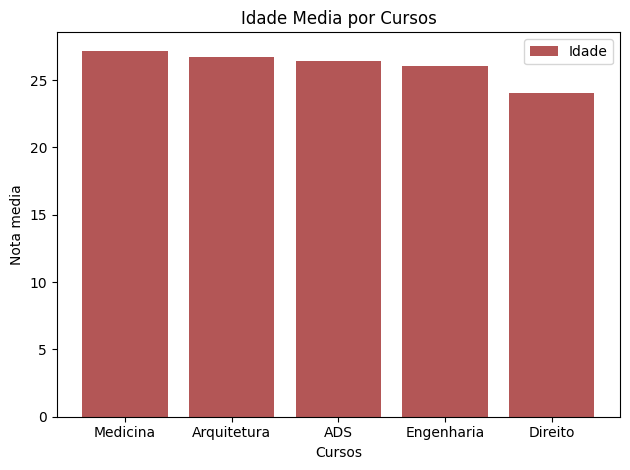

In [19]:
plt.bar(idade_mediacurso.index,idade_mediacurso.values,label='Idade', color='#b35656')
plt.title('Idade Media por Cursos')
plt.xlabel('Cursos')
plt.ylabel('Nota media')
plt.tight_layout()
plt.legend()
plt.show()

# Media de idade por semestre

In [20]:
media_idade_semestre = df.groupby('idade')['semestre'].mean().sort_values(ascending=False)

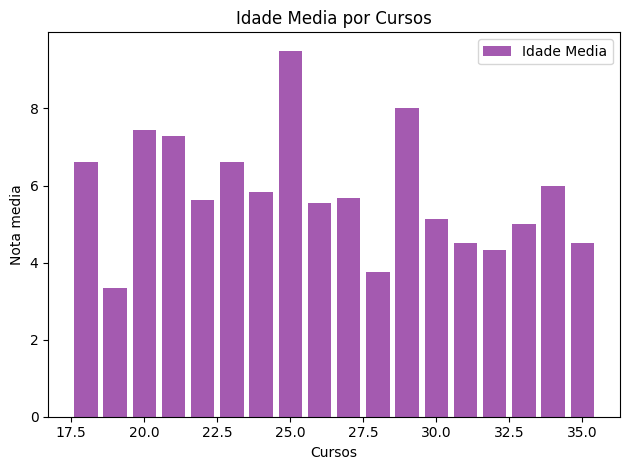

In [21]:
plt.bar(media_idade_semestre.index,media_idade_semestre.values,label='Idade Media', color='#a45ab0')
plt.title('Idade Media por Cursos')
plt.xlabel('Cursos')
plt.ylabel('Nota media')
plt.tight_layout()
plt.legend()
plt.show()